<a href="https://colab.research.google.com/github/stevearchuleta/plant_seedling_image_classification/blob/main/Plant_Seedling_Image_Classification_Project_8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em; color:#0e92ea"> **Steven Gilbert Archuleta**

<font color='orange'>
&nbsp;
    


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> **Plant Seedling Image Classification** (AIML Project 08, Convolutional Neural Network)</span></font>
  
<font color='orange'>

&nbsp;

Due: 18DEC2021 05:30 local time, 

Sacramento, California (PDT)

&nbsp;
[My GitHub Link for Project 8](https://github.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-may21-stevearchuleta)

***

###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Background and Context:**
  
<font color=darkblue>

&nbsp;

Differentiate a weed from a crop seedling.

Classify 12 species of plants.

The ability to effectively classify different species of crop seedlings (and/or weeds) can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

&nbsp;

###  <span style="font-family: Arial; font-weight:bold;font-size:1m;color:#0e92ea"> **Objectives:**
<font color=darkblue>

  
01. Explore and visualize the dataset.
02. Preprocess image data.
03. Visualize images.
04. Build Convolutional Neural Network(s).
05. Evaluate CNN model(s).
10. Evaluate model performance (accuracy).
11. Offer conclusions and insights.



###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Data Dictionary** 

(Raw .csv Data, Raw .npy data):

<font color=darkblue>
&nbsp;
    
This image dataset represents the original Plant Classification database from Kaggle. Herein, through the Great Learning Olypus Platform, the labels.csv file contain labels for the 12 species (to be split and used for the training set, the validation set, and the testing set). Due to the large volume of data in the original Kagel files, the images were converted to an images.npy file. These .npy data objects will be split and used for the training set, the validation set, and the testing set. 

***

<font color=orange>

## **IMPORT LIBRARIES AND PACKAGES** </font>

In [ ]:
# Reading the training images from the path and labelling them into the given categories
import numpy as np
import copy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import cv2 as cv2
import os

# for data visualization
import seaborn as sns  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras
#sequential api for sequential model
from tensorflow.keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
#importing different layers 
from tensorflow.keras.layers import Dense, Dropout, Flatten, RandomFlip, RandomRotation, RandomZoom  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
#to perform one-hot encoding
from tensorflow.keras.utils import to_categorical  
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#optimiers for optimizing the model
from tensorflow.keras.optimizers import RMSprop, Adam
#regularization method to prevent the overfitting 
from keras.callbacks import EarlyStopping  
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers

***

<font color=orange>

## **1. READ THE DATASET AFTER IMPORTING DATASET INTO GOOGLE COLAB** </font>

In [ ]:
# mount google drive (to access the file on my google drive)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive/Colab Notebooks/Project_8'
labels = 'Labels.csv'
images = 'images.npy'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Project_8


In [ ]:
# read dataset as a pandas dataframe
images = np.load(images)
labels = pd.read_csv(labels)



***

<font color=orange>

## **2. SHAPE OF DATA** </font>

In [ ]:
print(labels.shape[0])
print(labels.shape[1])
print(
    f"In this Plant Classification dataset, there are {labels.shape[0]} data objects and {labels.shape[1]} column named 'labels'."
)

print('\n')
print(images.shape[0])
print(images.shape[1])
print(images.shape[2])
print(images.shape[3])

print(
    f"In this Plant Classification dataset, there are {images.shape[0]} data images each consisting of a {images.shape[1]} x {images.shape[2]} grid of pixels and possessing {images.shape[3]} color channel features."
)
print('\n')


4750
1
In this Plant Classification dataset, there are 4750 data objects and 1 column named 'labels'.


4750
128
128
3
In this Plant Classification dataset, there are 4750 data images each consisting of a 128 x 128 grid of pixels and possessing 3 color channel features.




***

<font color=orange>

## **3. PROPORTION OF EACH CLASS** </font>

In [ ]:
# OVERALL COUNT OF EACH CATEGORY IN THE LABEL ATTRIBUTE
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [ ]:
# OVERALL PERCENTAGE OF EACH CATEGORY IN THE LABEL ATTRIBUTE
labels.value_counts(normalize=True)

Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Maize                        0.046526
Common wheat                 0.046526
dtype: float64

***

<font color=orange>

## **4. PLOT OF IMAGES FROM EACH CLASS WITH CORRESPONDING LABELS** </font>

Black-grass


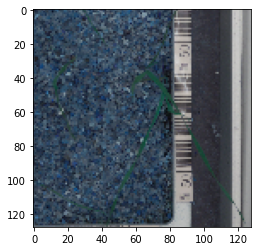

Charlock


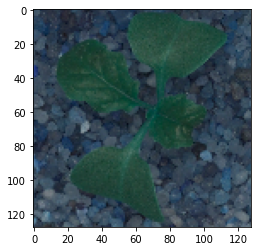

Cleavers


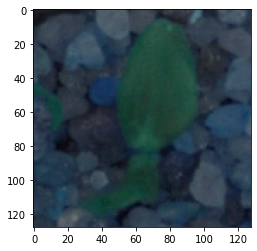

Common Chickweed


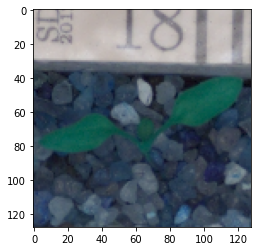

Common wheat


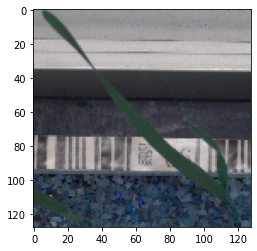

Fat Hen


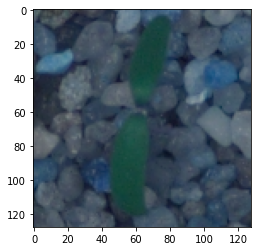

Loose Silky-bent


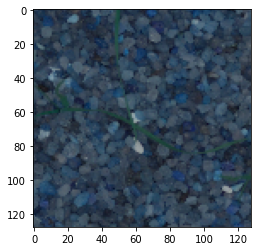

Maize


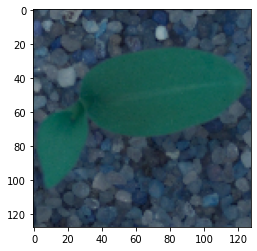

Scentless Mayweed


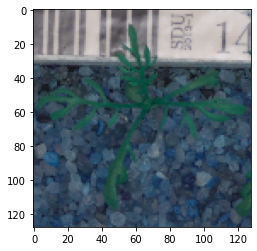

Shepherds Purse


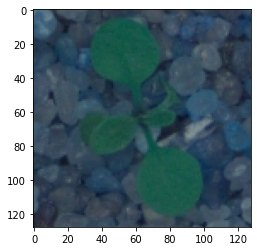

Small-flowered Cranesbill


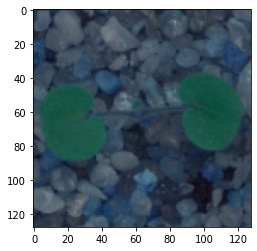

Sugar beet


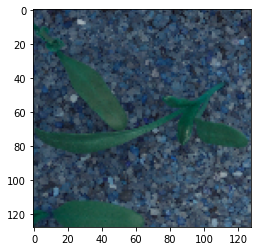

In [ ]:
# [list with two lists - an array]
indexed_labels = np.unique(labels['Label'], return_index=True)
# use a for loop to print the unique labels
for i in np.arange(len(indexed_labels[0])):
  print(indexed_labels[0][i])
  plt.imshow(images[indexed_labels[1][i]])
  plt.show()

In [ ]:
# LABELS AND THE INDEX OF THEIR FIRST OCCURANCE
indexed_labels

(array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
        'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
        'Scentless Mayweed', 'Shepherds Purse',
        'Small-flowered Cranesbill', 'Sugar beet'], dtype=object),
 array([3833, 2034, 2424, 1423, 1202,  496, 4096, 3612, 2711,  971,    0,
        3227]))

In [ ]:
# LIST OF UNIQUE LABELS
indexed_labels[0]

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [ ]:
# POSITION OF THE FIRST OCCURANCE OF EACH UNIQUE LABEL
# A 'Sugar beet' image happens to first occur at index number 3227, and... 
# A 'Small-flowered Cranesbill' happens to first occur at index number 0. 
indexed_labels[1]

array([3833, 2034, 2424, 1423, 1202,  496, 4096, 3612, 2711,  971,    0,
       3227])

In [ ]:
# FIRST UNIQUE LABEL IN THE ARRAY OF UNIQUE LABELS
indexed_labels[0][0]

'Black-grass'

In [ ]:
# POSITION OF THE FIRST OCCURANCE OF 'BLACK-GRASS' (which is the name of the first plant label in the array)
indexed_labels[1][0]

3833

***

<font color=orange>

## **5. PLOT THE MEAN IMAGE FOR EACH CLASS** </font>


In order to compute the mean image for each class, all images of a particuar class must be separated into their own new list.

1) Group each class label into its own dataframe using groupby()'s get_group() method, such that it becomes possible to...


2) Also isolate the label indies (as they are numbered in the original label dataframe) into that particular class's new dataframe, then...


3) Use those particular indices inside a for loop, whereby...


4) Each image (for that particular class) can now get appended to a new, empty list of images (for that particular class).


5) Take the mean of the newly populated list of images (those images belonging to only that particuar class).

In [ ]:
#=================================================================
# BLACKGRASS IMAGE LIST

# BLACKGRASS DATAFRAME
blackgrass_df = labels.groupby('Label').get_group('Black-grass')
# BLACKGRASS INDICES
indices_of_blackgrass_images = blackgrass_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
blackgrass_images = []
# LOOP THROUGH BLACKGRASS INDICES TO ADD ONLY BLACKGRASS IMAGES 
for index in indices_of_blackgrass_images:
  blackgrass_images.append(images[index])

#=================================================================
# CHARLOCK IMAGE LIST

# CHARLOCK DATAFRAME
charlock_df = labels.groupby('Label').get_group('Charlock')
# CHARLOCK INDICES
indices_of_charlock_images = charlock_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
charlock_images = []
# LOOP THROUGH CHARLOCK INDICES TO ADD ONLY CHARLOCK IMAGES 
for index in indices_of_charlock_images:
  charlock_images.append(images[index])

#=================================================================
# CLEAVERS IMAGE LIST

# CLEAVERS DATAFRAME
cleavers_df = labels.groupby('Label').get_group('Cleavers')
# CLEAVERS INDICES
indices_of_cleavers_images = cleavers_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
cleavers_images = []
# LOOP THROUGH CLEAVERS INDICES TO ADD ONLY CLEAVERS IMAGES 
for index in indices_of_cleavers_images:
  cleavers_images.append(images[index])

#=================================================================
# COMMON CHICKWEED IMAGE LIST

# COMMON CHICKWEED DATAFRAME
common_chickweed_df = labels.groupby('Label').get_group('Common Chickweed')
# COMMON CHICKWEED INDICES
indices_of_common_chickweed_images = common_chickweed_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
common_chickweed_images = []
# LOOP THROUGH COMMON CHICKWEED INDICES TO ADD ONLY COMMON CHICKWEED IMAGES 
for index in indices_of_common_chickweed_images:
  common_chickweed_images.append(images[index])

#=================================================================
# COMMON WHEAT IMAGE LIST

# COMMON WHEAT DATAFRAME
common_wheat_df = labels.groupby('Label').get_group('Common wheat')
# COMMON WHEAT INDICES
indices_of_common_wheat_images = common_wheat_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
common_wheat_images = []
# LOOP THROUGH COMMON WHEAT INDICES TO ADD ONLY COMMON WHEAT IMAGES 
for index in indices_of_common_wheat_images:
  common_wheat_images.append(images[index])

#=================================================================
# FAT HEN IMAGE LIST

# FAT HEN DATAFRAME
fat_hen_df = labels.groupby('Label').get_group('Fat Hen')
# FAT HEN INDICES
indices_of_fat_hen_images = fat_hen_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
fat_hen_images = []
# LOOP THROUGH FAT HEN INDICES TO ADD ONLY COMMON FAT HEN IMAGES 
for index in indices_of_fat_hen_images:
  fat_hen_images.append(images[index])

#=================================================================
# LOOSE SILKY_BENT IMAGE LIST

# LOOSE SILKY_BENT DATAFRAME
loose_silky_bent_df = labels.groupby('Label').get_group('Loose Silky-bent')
# LOOSE SILKY_BENT INDICES
indices_of_loose_silky_bent_images = loose_silky_bent_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
loose_silky_bent_images = []
# LOOP THROUGH LOOSE SILKY_BENT INDICES TO ADD ONLY LOOSE SILKY_BENT IMAGES 
for index in indices_of_loose_silky_bent_images:
  loose_silky_bent_images.append(images[index])

#=================================================================
# MAIZE IMAGE LIST

# MAIZE DATAFRAME
maize_df = labels.groupby('Label').get_group('Maize')
# MAIZE INDICES
indices_of_maize_images = maize_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
maize_images = []
# LOOP THROUGH MAIZE INDICES TO ADD ONLY MAIZE IMAGES 
for index in indices_of_maize_images:
  maize_images.append(images[index])

#=================================================================
# SCENTLESS MAYWEED IMAGE LIST

# SCENTLESS MAYWEED DATAFRAME
scentless_mayweed_df = labels.groupby('Label').get_group('Scentless Mayweed')
# SCENTLESS MAYWEED INDICES
indices_of_scentless_mayweed_images = scentless_mayweed_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
scentless_mayweed_images = []
# LOOP THROUGH SCENTLESS MAYWEED INDICES TO ADD ONLY SCENTLESS MAYWEED IMAGES 
for index in indices_of_scentless_mayweed_images:
  scentless_mayweed_images.append(images[index])

#=================================================================
# SHEPHERDS PURSE IMAGE LIST

# SHEPHERDS PURSE DATAFRAME
shepherds_purse_df = labels.groupby('Label').get_group('Shepherds Purse')
# SHEPHERDS PURSE INDICES
indices_of_shepherds_purse_images = shepherds_purse_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
shepherds_purse_images = []
# LOOP THROUGH SHEPHERDS PURSE INDICES TO ADD ONLY SHEPHERDS PURSE IMAGES 
for index in indices_of_shepherds_purse_images:
  shepherds_purse_images.append(images[index])

#=================================================================
# SMALL FLOWERED CRANESBILL IMAGE LIST

# SMALL FLOWERED CRANESBILL DATAFRAME
small_flowered_cranesbill_df = labels.groupby('Label').get_group('Small-flowered Cranesbill')
# SMALL FLOWERED CRANESBILL INDICES
indices_of_small_flowered_cranesbill_images = small_flowered_cranesbill_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
small_flowered_cranesbill_images = []
# LOOP THROUGH SMALL FLOWERED CRANESBILL INDICES TO ADD ONLY SMALL FLOWERED CRANESBILL IMAGES 
for index in indices_of_small_flowered_cranesbill_images:
  small_flowered_cranesbill_images.append(images[index])

#=================================================================
# SUGAR BEET IMAGE LIST

# SUGAR BEET DATAFRAME
sugar_beet_df = labels.groupby('Label').get_group('Sugar beet')
# SUGAR BEET INDICES
indices_of_sugar_beet_images = sugar_beet_df.index.tolist()
# EMPTY LIST (to be populated via the for loop)
sugar_beet_images = []
# LOOP THROUGH SUGAR BEET INDICES TO ADD ONLY SUGAR BEET IMAGES 
for index in indices_of_sugar_beet_images:
  sugar_beet_images.append(images[index])

In [ ]:
# ANOTHER METHOD FOR CREATING 12 LISTS OF IMAGES
# NESTED FOR LOOPS (WITH CONDITIONAL FORMATTING)

blackgrass_image_list = []
charlock_image_list = []
cleavers_image_list = []
common_chickweed_image_list = []
common_wheat_image_list = []
fat_hen_image_list = []
loose_silky_bent_image_list = []
maize_image_list = []
shepherds_purse_image_list = []
small_flowered_cranesbill_image_list = []
sugar_beet_image_list = []
scentless_mayweed_image_list = []

grouped = labels.groupby('Label')
for label_name, group_df in grouped:
  if label_name == 'Black-grass':
    for i in group_df.index.tolist():
      blackgrass_image_list.append(images[i])
  if label_name == 'Charlock':
    for i in group_df.index.tolist():
      charlock_image_list.append(images[i])
  if label_name == 'Cleavers':
    for i in group_df.index.tolist():
      cleavers_image_list.append(images[i])  
  if label_name == 'Common Chickweed':
    for i in group_df.index.tolist():
      common_chickweed_image_list.append(images[i])  
  if label_name == 'Common wheat':
    for i in group_df.index.tolist():
      common_wheat_image_list.append(images[i])  
  if label_name == 'Fat Hen':
    for i in group_df.index.tolist():
      fat_hen_image_list.append(images[i])  
  if label_name == 'Loose Silky-bent':
    for i in group_df.index.tolist():
      loose_silky_bent_image_list.append(images[i])  
  if label_name == 'Maize':
    for i in group_df.index.tolist():
      maize_image_list.append(images[i])
  if label_name == 'Scentless Mayweed':
    for i in group_df.index.tolist():
      scentless_mayweed_image_list.append(images[i]) 
  if label_name == 'Shepherds Purse':
    for i in group_df.index.tolist():
      shepherds_purse_image_list.append(images[i])
  if label_name == 'Small-flowered Cranesbill':
    for i in group_df.index.tolist():
      small_flowered_cranesbill_image_list.append(images[i])
  if label_name == 'Sugar beet':
    for i in group_df.index.tolist():
      sugar_beet_image_list.append(images[i])

Black-grass(mean image):


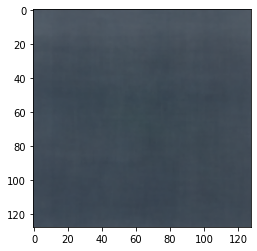

Charlock(mean image):


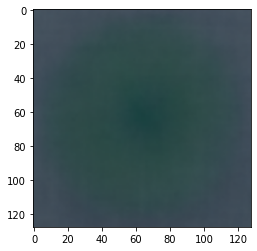

Cleavers(mean image):


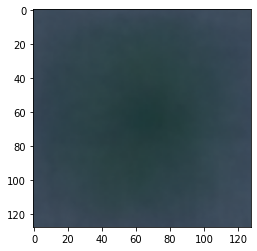

Common Chickweed(mean image):


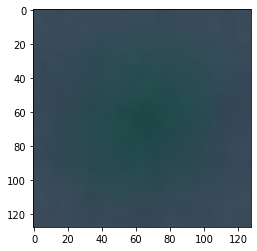

Common Wheat(mean image):


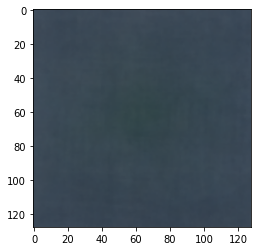

Fat Hen(mean image):


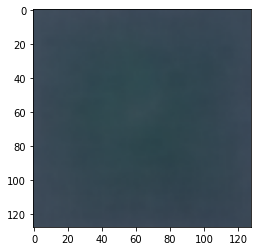

Loose Silky-bent(mean image):


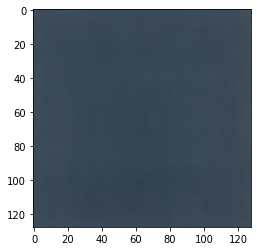

Maize(mean image):


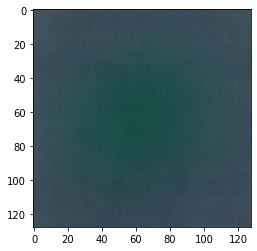

Scentless Mayweed(mean image):


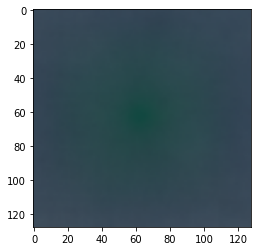

Shepherds Purse(mean image):


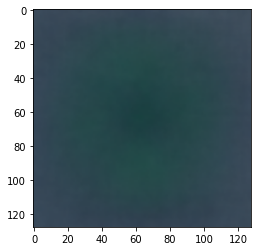

Small Flowered Cranesbill(mean image):


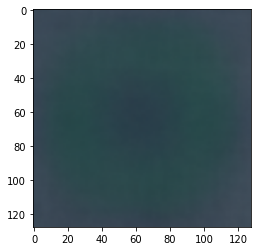

Sugar Beet(mean image):


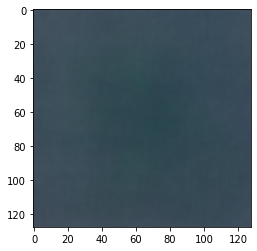

In [ ]:
# FUNCTION TO DISPLAY THE MEAN IMAGE FOR EACH CLASS

def display_mean_image(image_list, species):
  """This function calculates the mean image for each class and displays it in a plt graph"""
  print(f'{species}(mean image):')
  # np.mean() all images of a particular class into one (1) single image
  mean_image_as_float = np.mean(image_list, axis=0)
  mean_image_as_integer = np.mean(image_list, axis=0).astype('uint8')
  plt.imshow(mean_image_as_integer)
  plt.show()

blackgrass_mean = display_mean_image(blackgrass_images, 'Black-grass')
charlock_mean = display_mean_image(charlock_images, 'Charlock')
cleavers_mean = display_mean_image(cleavers_images, 'Cleavers')
chickweed_mean = display_mean_image(common_chickweed_images, 'Common Chickweed')
wheat_mean = display_mean_image(common_wheat_images, 'Common Wheat')
fat_hen_mean = display_mean_image(fat_hen_images, 'Fat Hen')
loose_silky_bent_mean = display_mean_image(loose_silky_bent_images, 'Loose Silky-bent')
maize_mean = display_mean_image(maize_images, 'Maize')
scentless_mayweed_mean = display_mean_image(scentless_mayweed_images, 'Scentless Mayweed')
shepherds_purse_mean = display_mean_image(shepherds_purse_images, 'Shepherds Purse')
cranesbill_mean = display_mean_image(small_flowered_cranesbill_images, 'Small Flowered Cranesbill')
sugar_beet_mean = display_mean_image(sugar_beet_images, 'Sugar Beet')

***

<font color=orange>

## **6. OTHER EDA (Contrast Differences against Maize)** </font>

In [ ]:
# fig = plt.figure(figsize = (8,6))

# for i in enumerate([blackgrass_mean, charlock_mean, cleavers_mean, chickweed_mean, wheat_mean, fat_hen_mean, loose_silky_bent_mean, maize_mean, scentless_mayweed_mean, shepherds_purse_mean, cranesbill_mean, sugar_beet_mean]):
  
#   contrast_mean_against_maize = maize_mean - i[1]
#   plt.imshow(contrast_mean_against_maize, cmap='bwr')
#   if i[0]==0:
#     plt.title(f'Difference Between Maize & Black-grass Average')
#   if i[0]==1:
#     plt.title(f'Difference Between Maize & Charlock Average')
#   if i[0]==2:
#     plt.title(f'Difference Between Maize & Cleavers Average') 
#   if i[0]==3:
#     plt.title(f'Difference Between Maize & Chickweed Average')
#   if i[0]==4:
#     plt.title(f'Difference Between Maize & Wheat Average')
#   if i[0]==5:
#     plt.title(f'Difference Between Maize & Fat Hen Average')
#   if i[0]==6:
#     plt.title(f'Difference Between Maize & Loose Silky Bent Average')
#   if i[0]==7:
#     plt.title(f'Difference Between Maize & Its Own Average')
#   if i[0]==8:
#     plt.title(f'Difference Between Maize & Scentless Mayweed Average')
#   if i[0]==9:
#     plt.title(f'Difference Between Maize & Shepherds Purse Average')
#   if i[0]==10:
#     plt.title(f'Difference Between Maize & Cranesbill Average')
#   if i[0]==11:
#     plt.title(f'Difference Between Maize & Sugar Beet Average')
#   plt.axis('off')
#   plt.show()

<font color=orange>

## **7. OBSERVATIONS FROM EDA** </font>

**Loose Silky-bent** -- MOST data objects: 13.77% of all images


**Common Chickweed** -- SECOND MOST data objects: 12.86% of all images

**Common Wheat** -- LEAST data objects: 4.65% of all data images

**Maize** -- LEAST data objects: 4.65%

<font color=blue>
It makes sense that the model would need to focus it's algorithm on a more robust sampling of weed images versus crop images. Wheat and Corn might be more easily identifiable to the farmer than an invasive species. Therefore, it is important that the CNN model be able to classify weeds with more accuracy.

***
**Broad Leaf Seedlings** -- Charlock, Cleavers, Common Chickweed, Maize, Shepherds Purse, Small-Flowered Cranesbill

**Narrow Leaf Seedlings** -- Black-grass, Common Wheat, Fat Hen, Loose Silky-bent, Scentless Mayweed, Sugar Beet

***
**Mean Images that show "Greenness"** -- Charlock, Cleavers, Chickweed, Maize, Shepherds Purse, Small-Flowered Cranesbill, Sugar Beet (at this stage my education, it is very difficult to interpret the importance of a mean image) 


***

<font color=orange>

## **8. PLOT IMAGES (before blurring and normalization)** </font>

Image 1967 before Gaussian Blurring and Normalization.


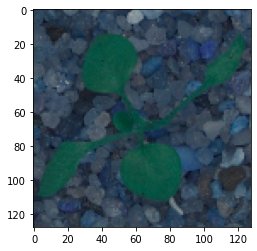

Image 0 before Gaussian Blurring and Normalization.


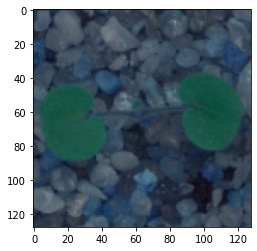

In [ ]:
# Random Image at index 1967
# ========================================================
# BEFORE
print('Image 1967 before Gaussian Blurring and Normalization.')
plt.imshow(images[1967])
plt.show()
#=========================================================

# First Image at index 0
# ========================================================
# BEFORE
print('Image 0 before Gaussian Blurring and Normalization.')
plt.imshow(images[0])
plt.show()
#=========================================================

***

<font color=orange>

## **9. GUASSIAN BLURRING TO REMOVE NOISE** </font>

In [ ]:
# Empty array to store the blurred images
gaussian_images = np.empty((4750, 128, 128, 3))

# iterate i (enumerate 0 to 4750)
# image = the values within a 128x128x3 image (that is yielded by the iterable argument, images)
for i, image in enumerate(images):
  gaussian_images[i] = cv2.GaussianBlur(image, (3,3), 0);
  

In [ ]:
print(len(gaussian_images))

4750


In [ ]:
print(gaussian_images.shape)

(4750, 128, 128, 3)


***

<font color=orange>

## **10. NORMALIZATION (STANDARDIZATION OF IMAGE GRADIENT VALUES)** </font>

In [ ]:
# Empty array to store the images that have been both blurred and normalized
blurred_and_normalized_images = np.empty((4750 ,128 ,128 ,3))

# Create a zero matrix (for normalization)
normalized_image = np.zeros((128, 128))

# Normalize the blurred images (gaussian_images)
# i (enumerate 0 to 4750)
# image = the values within a 128x128x3 image (these values are presented by the iterable argument, gaussian_images)
for i, image in enumerate(gaussian_images):
  gaussian_images[i] = cv2.normalize(gaussian_images[i], normalized_image, 0, 255, cv2.NORM_MINMAX)
  
# Cast gaussian_images into an integer (because normalization converted all image values into floats)
blurred_and_normalized_images = copy.deepcopy(gaussian_images).astype('uint8')

In [ ]:
print(blurred_and_normalized_images.shape)
print(len(blurred_and_normalized_images))

(4750, 128, 128, 3)
4750


In [ ]:
print(gaussian_images.shape)
print(len(gaussian_images))

(4750, 128, 128, 3)
4750


In [ ]:
# NOTE:  I shall use gaussian_images for my train_test_split below, becasue it too has been blurred and normalized yet remains as a float datatype
print('DataType of gaussian_images:', gaussian_images.dtype)
print('DataType of blurred_and_normalized_images:', blurred_and_normalized_images.dtype)

DataType of gaussian_images: float64
DataType of blurred_and_normalized_images: uint8


***


<font color=orange>

## **11. PLOT IMAGES (after blurring and normalization)** </font>


Blurring creates a more blurred effect (removing noise)
Normalization normalizes the distribution which creates sharper edges

Image 1967 before Gaussian Blurring and Normalization.


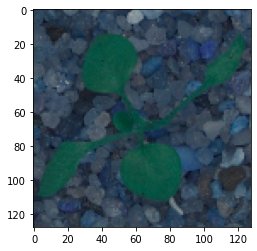

Image 1967 after Gaussian Blurring and Normalization


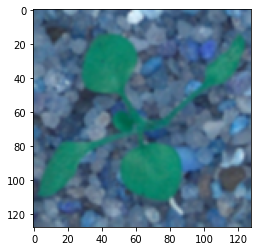




Image 0 before Gaussian Blurring and Normalization.


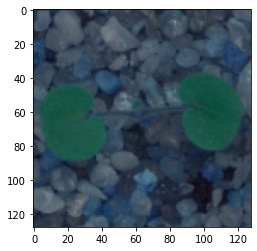

Image 0 after Gaussian Blurring and Normalization


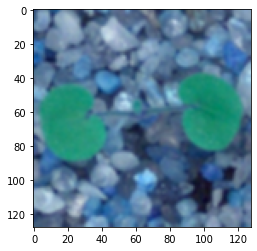

In [ ]:
# Random Image at index 1967
# ========================================================
# BEFORE
print('Image 1967 before Gaussian Blurring and Normalization.')
plt.imshow(images[1967])
plt.show()

# AFTER
print('Image 1967 after Gaussian Blurring and Normalization')
plt.imshow(blurred_and_normalized_images[1967])
plt.show()
#=========================================================

print('\n\n')

# First Image at index 0
# ========================================================
# BEFORE
print('Image 0 before Gaussian Blurring and Normalization.')
plt.imshow(images[0])
plt.show()

# AFTER
print('Image 0 after Gaussian Blurring and Normalization')
plt.imshow(blurred_and_normalized_images[0])
plt.show()
#=========================================================

***

<font color=orange>

## **12. SPLIT DATA INTO TRAINING SETS AND TESTING SETS** </font>

In [ ]:
# 70/30 split
# no matter how many images exist within each class, stratify all classes in the same 70:30 proportion

# Note:
# Decided to use my gaussian_image dataframe (rather than my blurred_and_normalized_images dataframe) because...
# the gaussian_image dataframe has also been blurred and normalized but it remains as a float datatype
# Perhaps, during reshape, if I had to convert blurred_and_normalized_images from integer to float, then I might lose some information during the casting process?!?!? 

X_train, X_test, y_train, y_test = train_test_split(gaussian_images, labels, test_size = 0.3, stratify=labels, random_state=1)

***

<font color=orange>

## **13. CONVERT THE 12 SPECIES LABELS INTO CATEGORICAL BINARY SPARCE ENCODED VALUES VIA ONE HOT ENCODING** </font>

In [ ]:
# Use pandas get_dummies() method
y_train_e = pd.get_dummies(y_train)
y_test_e = pd.get_dummies(y_test)

<font color=orange>

## **14. SHAPE OF DATA** </font>

***

In [ ]:
print(f'Training Labels:{y_train_e.shape}')
print(f'Testing Labels:{y_test_e.shape}')
print('\n')
print(f'Training Images:{X_train.shape}')
print(f'Testing Images:{X_test.shape}')

Training Labels:(3325, 12)
Testing Labels:(1425, 12)


Training Images:(3325, 128, 128, 3)
Testing Images:(1425, 128, 128, 3)


***

<font color=orange>

## **15. RESHAPE DATA** </font>

Herein, the pixel graph never deviated from its original 128 x 128 shape.

Bind values between 0 and 1

In [ ]:
# Check datatype
# remember... gaussian_imagess dataframe is already of float type (and has been blurred and normalized)
print(X_train.dtype)
print(X_test.dtype)

float64
float64


In [ ]:
print(X_train.max())
print(X_test.max())

255.00000000000006
255.00000000000006


In [ ]:
# feature values (pixel values) will now be bounded between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(f'Training Labels:{y_train_e.shape}')
print(f'Testing Labels:{y_test_e.shape}')
print('\n')
print(f'Training Images:{X_train.shape}')
print(f'Testing Images:{X_test.shape}')

Training Labels:(3325, 12)
Testing Labels:(1425, 12)


Training Images:(3325, 128, 128, 3)
Testing Images:(1425, 128, 128, 3)


***

<font color=orange>

## **16. BUILD CONVOLUTIOINAL NEURAL NETWORK -- MODEL ONE (1)** </font>

I.   METRICS (Funcition Definitions)


II.  Define the optimizer, its learning rate, the loss function, and measurable metric


III. MODEL ONE (1)... utilize Transfer Learning


                  Base model: ResNet152V2                 
                  Number of Conv2D filters 128
                  Number of neurons in first DNN hidden layers 32
                  Number of neurons in second DNN hidden 16
                  Number of Epochs 10
                  Batch size 64


In [ ]:
# I. FUNCTION DEFINITIONS

# SKLEARN METRICS
# CONFUSION MATRIX and ACCURACY SCORE FUNCTION
def model_evaluation(model, X, y):
  """This function returns a confusion matrix.  This function also returns an accuracy score."""

  classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet']
       
  # Append the index of the max element of all the particular labels to a new list
  # Pass this new list into the confusion matrix argument
  label_indices = []
  for i in np.arange(y.shape[0]):
    label_indices.append(np.argmax(y.iloc[i]))
    
    # model.predict()
    predictions = np.argmax(model.predict(X), axis=1)

    # confusion matrix (12 x 12)
    confuse_matrix = confusion_matrix(label_indices, predictions, normalize=None)
    plt.figure(figsize=(12,6))
    sns.heatmap(confuse_matrix, xticklabels=classes, yticklabels=classes, annot=True, cbar=False );
    plt.show()

    # ACCURACY SCORE
    accuracy = accuracy_score(label_indices, predictions)
    print(f'This model scores a {accuracy : 0.2%} accuracy rate.')

# FUNCTION TO CALCULATE LOSS
def loss_curve(training_data):
  """Plot the loss of the training data in relation to the validation data accross each epoch"""
  # CONSTRUCT A HISTORY DATAFRAME (for training information)
  model_history = pd.Dataframe(training_data.history)
  # ADD EPOCH COLUMN TO HISTORY DATAFRAME
  model_history['epoch'] = training_data.epoch
  # BUILD LEARNING CURVE GRAPH
  plt.figure(figsize=(12, 4))
  # ADD x LABEL TO THE GRAPH
  plt.xlabel('Epochs')
  # ADD y LABEL TO THE GRAPH
  plt.ylabel('Loss')
  # ADD TITLE TO THE GRAPH
  plt.title('LEARNING CURVE', fontdict={'fontsize':20})
  # PLOT THE LOSS OF THE TRAINING DATA
  plt.plot(model_history['Training Loss'])
  # PLOT THE LOSS OF THE VALIDATION DATA
  plt.plot(model_history['Validation Loss'])
  # LEGEND
  plt.legend(('Training Data', 'Validation Data'), loc=0)


In [ ]:
# II. DEFINE: the optimizer, its learning rate, the loss function, and measurable metric

optimizer = Adam(learning_rate=1e-4)
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [ ]:
# III. BUILD MODEL; INSTANTIATE MODEL
# Utilize Transfer Learning
# =================================
# MODEL ONE (1)
# =================================

# BUILD A SEQUENTIAL ARCHITECTURE
# INCREASE THE DIVERSITY OF THE IMAGES (to train a more robust model)
# AUGMENT THE DATA BY FLIPPING IT, ROTATING IT, AND ZOOMING IT
# FREEZE BASE MODEL
data_augmentation = Sequential([RandomFlip('horizontal'), RandomRotation(.15), RandomZoom(.20)])
base_model = tf.keras.applications.ResNet152V2(input_shape=(128 ,128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_one_1 = Sequential([
                          data_augmentation,
                          base_model, 
                          Conv2D(filters=128, 
                          kernel_size=(3,3), 
                          padding='Same'), 
                          MaxPool2D(), 
                          Flatten(),
                          Dense(units=32, activation='relu'),
                          Dense(units=16, activation='relu'),
                          Dense(units=12, activation='softmax')
                          ]) 

model_one_1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

learning_curve = model_one_1.fit(X_train, y_train_e, epochs=10, batch_size=64, validation_split=0.20, verbose=1)

Epoch 1/10
42/42 [==============================] - 19s 199ms/step - loss: 0.5336 - accuracy: 0.1000 - val_loss: 0.4695 - val_accuracy: 0.1218
Epoch 2/10
42/42 [==============================] - 5s 131ms/step - loss: 0.4560 - accuracy: 0.1132 - val_loss: 0.4295 - val_accuracy: 0.1398
Epoch 3/10
42/42 [==============================] - 5s 128ms/step - loss: 0.4206 - accuracy: 0.1237 - val_loss: 0.3986 - val_accuracy: 0.1549
Epoch 4/10
42/42 [==============================] - 5s 128ms/step - loss: 0.3917 - accuracy: 0.1508 - val_loss: 0.3699 - val_accuracy: 0.1789
Epoch 5/10
42/42 [==============================] - 5s 128ms/step - loss: 0.3631 - accuracy: 0.1786 - val_loss: 0.3440 - val_accuracy: 0.2180
Epoch 6/10
42/42 [==============================] - 5s 128ms/step - loss: 0.3396 - accuracy: 0.2128 - val_loss: 0.3226 - val_accuracy: 0.2541
Epoch 7/10
42/42 [==============================] - 6s 132ms/step - loss: 0.3202 - accuracy: 0.2406 - val_loss: 0.3028 - val_accuracy: 0.2977
Epoch

In [ ]:
model_one_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 128)         2359424   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                      

In [ ]:
# model_evaluation(model=model_one_1, X=X_test, y=(y_test_e)
# loss_curve(learning_curve)

SyntaxError: ignored

In [ ]:
len(X_test) == len(y_test_e)

True

<font color=orange>

## **17. OBSERVATIONS ON MODEL ONE (1) PERFORMANCE** </font>

**MODEL ONE (1)**
######GPU Execution Time:


######Training   Loss: 0.2731
######Validation Loss: 0.2588


######Training Accuracy: .3214
######Validation Accuracy: .3173

######Trainable Parameters AFTER Flattening the multidimesional tensor: 17,148

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 2,359,424

######Total Trainable Parameters: 2,376,572


<font color=orange>

## **18. CAN MODEL BE IMPROVED** </font>

Model One (1) has a poor accuracy and unacceptabe loss (it may be underfitting).

I will try to reduce loss and improve accuracy.

For Model Two (2): 



                  base model: ResNet152V2                 
                  increase number of Conv2D filters from 128 to 256
                  Increase number of neurons in first DNN hidden layers from 32 to 64
                  Increase number of neurons in second DNN hidden layers from 16 to 32
                  Decrease number of Epochs from 10 to 5
                  Increase batch size from 64 to 128

      

***

<font color=orange>

## **19. BUILD MODEL TWO (2)** </font>

MODEL TWO (2)... Utilize Transfer Learning

                  Base model: ResNet152V2                 
                  Number of neurons in first DNN hidden layers 256
                  Number of neurons in second DNN hidden 128
                  Number of Epochs 10
                  Batch size 128

In [ ]:
# =================================
# MODEL TWO (2)
# =================================

# BUILD A SEQUENTIAL ARCHITECTURE
# INCREASE THE DIVERSITY OF THE IMAGES (to train a more robust model)
# AUGMENT THE DATA BY FLIPPING IT, ROTATING IT, AND ZOOMING IT
# FREEZE BASE MODEL
data_augmentation = Sequential([RandomFlip('horizontal'), RandomRotation(.15), RandomZoom(.20)])
base_model = tf.keras.applications.ResNet152V2(input_shape=(128 ,128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_two_2 = Sequential([
                          data_augmentation,
                          base_model, 
                          Conv2D(filters=256, 
                          kernel_size=(3,3), 
                          padding='Same'), 
                          MaxPool2D(), 
                          Flatten(),
                          Dense(units=32, activation='relu'),
                          Dense(units=16, activation='relu'),
                          Dense(units=12, activation='softmax')
                          ]) 

model_two_2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

learning_curve = model_two_2.fit(X_train, y_train_e, epochs=5, batch_size=128, validation_split=0.20, verbose=1)

Epoch 1/5
21/21 [==============================] - 17s 350ms/step - loss: 0.5553 - accuracy: 0.1128 - val_loss: 0.4805 - val_accuracy: 0.1504
Epoch 2/5
21/21 [==============================] - 4s 215ms/step - loss: 0.4521 - accuracy: 0.1895 - val_loss: 0.4368 - val_accuracy: 0.1985
Epoch 3/5
21/21 [==============================] - 4s 215ms/step - loss: 0.4177 - accuracy: 0.2090 - val_loss: 0.4064 - val_accuracy: 0.2226
Epoch 4/5
21/21 [==============================] - 4s 216ms/step - loss: 0.3908 - accuracy: 0.2305 - val_loss: 0.3912 - val_accuracy: 0.2301
Epoch 5/5
21/21 [==============================] - 4s 215ms/step - loss: 0.3732 - accuracy: 0.2395 - val_loss: 0.3702 - val_accuracy: 0.2376


In [ ]:
model_two_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         4718848   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                32800     
                                                      

In [ ]:
# model_evaluation(model=model_two_2, X=X_test, y=y_test_e)

# loss_curve(learning_curve)

ValueError: ignored

In [ ]:
len(X_test) == len(y_test_e)

True

<font color=orange>

## **20. OBSERVATIONS ON MODEL TWO (2) PERFORMANCE** </font>

**MODEL TWO (2)**
######GPU Execution Time:


######Training   Loss: 0.3732
######Validation Loss: 0.3702


######Training Accuracy: .2395
######Validation Accuracy: .2376


######Trainable Parameters AFTER Flattening the multidimesional tensor: 33,532

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 4,718,848

######Total Trainable Parameters: 4,752,380


<font color=orange>

## **21. CAN MODEL BE IMPROVED** </font>

Model Two (2) is performing worse than Model One (1) because accuracy decreased and loss increased.

Model Two (2) does appear to still be underfitting.

I will try to reduce loss and improve accuracy.

For Model Three (3): 



                  Change base model to: VGG19                 
                  Number of Conv2D filters 128
                  Nnumber of neurons in first DNN hidden layers 32
                  Number of neurons in second DNN hidden layers 16
                  Number of Epochs 10
                  Batch size 64


***

<font color=orange>

## **22. BUILD MODEL THREE (3)** </font>

MODEL THREE (3)... utilize Transfer Learning


                  Base model: VGG19                 
                  Number of Conv2D filters 128
                  Number of neurons in first DNN hidden layers 32
                  Number of neurons in second DNN hidden 16
                  Number of Epochs 10
                  Batch size 64
                  No Early Stopping

In [ ]:
# =================================
# MODEL THREE (3)
# =================================

# BUILD A SEQUENTIAL ARCHITECTURE
# INCREASE THE DIVERSITY OF THE IMAGES (to train a more robust model)
# AUGMENT THE DATA BY FLIPPING IT, ROTATING IT, AND ZOOMING IT
# FREEZE BASE MODEL
data_augmentation = Sequential([RandomFlip('horizontal'), RandomRotation(.15), RandomZoom(.20)])
base_model = tf.keras.applications.VGG19(input_shape=(128 ,128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_three_3 = Sequential([
                          data_augmentation,
                          base_model, 
                          Conv2D(filters=128, 
                          kernel_size=(3,3), 
                          padding='Same'), 
                          MaxPool2D(), 
                          Flatten(),
                          Dense(units=32, activation='relu'),
                          Dense(units=16, activation='relu'),
                          Dense(units=12, activation='softmax')
                          ]) 

model_three_3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

learning_curve = model_three_3.fit(X_train, y_train_e, epochs=10, batch_size=64, validation_split=0.20, verbose=1)

80150528/80134624 [==============================] - 0s 0us/step
Epoch 1/10
42/42 [==============================] - 9s 124ms/step - loss: 0.3960 - accuracy: 0.1602 - val_loss: 0.3303 - val_accuracy: 0.1789
Epoch 2/10
42/42 [==============================] - 3s 67ms/step - loss: 0.3243 - accuracy: 0.1917 - val_loss: 0.3100 - val_accuracy: 0.1940
Epoch 3/10
42/42 [==============================] - 3s 64ms/step - loss: 0.3079 - accuracy: 0.2011 - val_loss: 0.2951 - val_accuracy: 0.2060
Epoch 4/10
42/42 [==============================] - 3s 64ms/step - loss: 0.2953 - accuracy: 0.2158 - val_loss: 0.2838 - val_accuracy: 0.2120
Epoch 5/10
42/42 [==============================] - 3s 64ms/step - loss: 0.2847 - accuracy: 0.2316 - val_loss: 0.2732 - val_accuracy: 0.2316
Epoch 6/10
42/42 [==============================] - 3s 64ms/step - loss: 0.2761 - accuracy: 0.2406 - val_loss: 0.2642 - val_accuracy: 0.2526
Epoch 7/10
42/42 [==============================] - 3s 63ms/step - loss: 0.2657 - accura

In [ ]:
model_three_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         589952    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                16416     
                                                      

In [ ]:
# model_evaluation(model=model_three_3, X=X_test, y=y_test_e)

# loss_curve(learning_curve)

ValueError: ignored

In [ ]:
len(X_test) == len(y_test_e)

True

<font color=orange>

## **23. OBSERVATIONS ON MODEL THREE (3) PERFORMANCE** </font>

**MODEL THREE (3)**
######GPU Execution Time:


######Training   Loss: 0.2381
######Validation Loss: 0.2265


######Training Accuracy: .3455
######Validation Accuracy: .3835

######Trainable Parameters AFTER Flattening the multidimesional tensor: 17,148

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 589,952

######Total Trainable Parameters: 607,100


<font color=orange>

## **24. CAN MODEL BE IMPROVED** </font>

Model Three (3), in terms of both accuracy and loss, is performing better than Model One (1), and Model Two (2).  Still, the Model Three (3) metrics are disappointing.

I will try to reduce loss and improve accuracy.

For Model Four (4): 



                  Base model: VGG19                 
                  Increase number of Conv2D filters from 128 to 256
                  Increase number of neurons in first DNN hidden layers from 32 to 64
                  Increase number of neurons in second DNN hidden layers from 16 to 32
                  Decrease number of Epochs from 10 to 5
                  Increase batch size from 64 to 128

      

***

<font color=orange>

## **25. BUILD MODEL FOUR (4)** </font>

MODEL FOUR (4)... utilize Transfer Learning

                  Base model: VGG19                
                  Number of Conv2D filters 256
                  Number of neurons in first DNN hidden layers 64
                  Number of neurons in second DNN hidden 32
                  Number of Epochs 5
                  Batch size 128

In [ ]:
# =================================
# MODEL FOUR (4)
# =================================

# BUILD A SEQUENTIAL ARCHITECTURE
# INCREASE THE DIVERSITY OF THE IMAGES (to train a more robust model)
# AUGMENT THE DATA BY FLIPPING IT, ROTATING IT, AND ZOOMING IT
# FREEZE BASE MODEL
data_augmentation = Sequential([RandomFlip('horizontal'), RandomRotation(.15), RandomZoom(.20)])
base_model = tf.keras.applications.VGG19(input_shape=(128 ,128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_four_4 = Sequential([
                          data_augmentation,
                          base_model, 
                          Conv2D(filters=256, 
                          kernel_size=(3,3), 
                          padding='Same'), 
                          MaxPool2D(), 
                          Flatten(),
                          Dense(units=64, activation='relu'),
                          Dense(units=32, activation='relu'),
                          Dense(units=12, activation='softmax')
                          ]) 

model_four_4.compile(optimizer=optimizer, loss=loss, metrics=metrics)

learning_curve = model_four_4.fit(X_train, y_train_e, epochs=5, batch_size=128, validation_split=0.20, verbose=1)

Epoch 1/5
21/21 [==============================] - 11s 297ms/step - loss: 0.4165 - accuracy: 0.1714 - val_loss: 0.3180 - val_accuracy: 0.3323
Epoch 2/5
21/21 [==============================] - 2s 120ms/step - loss: 0.3085 - accuracy: 0.3008 - val_loss: 0.2697 - val_accuracy: 0.3759
Epoch 3/5
21/21 [==============================] - 2s 120ms/step - loss: 0.2710 - accuracy: 0.3342 - val_loss: 0.2422 - val_accuracy: 0.4120
Epoch 4/5
21/21 [==============================] - 2s 120ms/step - loss: 0.2480 - accuracy: 0.3883 - val_loss: 0.2266 - val_accuracy: 0.4466
Epoch 5/5
21/21 [==============================] - 2s 119ms/step - loss: 0.2329 - accuracy: 0.4274 - val_loss: 0.2163 - val_accuracy: 0.4632


In [ ]:
model_four_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         1179904   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                65600     
                                                      

In [ ]:
# model_evaluation(model=model_four_4, X=X_test, y=y_test_e)

# loss_curve(learning_curve)

ValueError: ignored

In [ ]:
len(X_test) == len(y_test)

True

<font color=orange>

## **26. OBSERVATIONS ON MODEL FOUR (4) PERFORMANCE** </font>

**MODEL FOUR (4)**
######GPU Execution Time:


######Training   Loss: 0.2329
######Validation Loss: 0.2163


######Training Accuracy: .4274
######Validation Accuracy: .4632


######Trainable Parameters AFTER Flattening the multidimesional tensor: 68,076

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 1,179,904

######Total Trainable Parameters: 1,247,980


<font color=orange>

## **27. CAN MODEL BE IMPROVED** </font>

Model One (4), a VGG19 base model, performs best so far, but still not well.  None of the VGG19 models overfit.

I will try to reduce loss and improve accuracy.

For Model Four (5): 



                  Emulate the MLS Brain Tumor's first CNN model

      

***

<font color=orange>

## **28. BUILD MODEL FIVE (5)** </font>

MODEL Five (5)


                  Emulate the MLS Brain Tumor's first CNN model
                  CNN with Dropout             
                 

In [ ]:
# =================================
# MODEL FIVE (5)
# Emulate architecture from MLS Brain Tumor's first CNN model
# =================================

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train_e=np.array(y_train_e)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30
42/42 [==============================] - ETA: 0s - loss: 2.4341 - accuracy: 0.1350
Epoch 00001: val_accuracy improved from -inf to 0.13835, saving model to best_model.h5
42/42 [==============================] - 4s 79ms/step - loss: 2.4341 - accuracy: 0.1350 - val_loss: 2.4149 - val_accuracy: 0.1383
Epoch 2/30
41/42 [============================>.] - ETA: 0s - loss: 2.4268 - accuracy: 0.1376
Epoch 00002: val_accuracy improved from 0.13835 to 0.16391, saving model to best_model.h5
42/42 [==============================] - 2s 49ms/step - loss: 2.4263 - accuracy: 0.1372 - val_loss: 2.4010 - val_accuracy: 0.1639
Epoch 3/30
41/42 [============================>.] - ETA: 0s - loss: 2.1825 - accuracy: 0.2896
Epoch 00003: val_accuracy improved from 0.16391 to 0.40301, saving model to best_model.h5
42/42 [==============================] - 2s 49ms/step - loss: 2.1820 - accuracy: 0.2887 - val_loss: 1.8535 - val_accuracy: 0.4030
Epoch 4/30
41/42 [============================>.] - ETA: 0s -

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)      

<font color=orange>

## **29. OBSERVATIONS ON MODEL FIVE (5) PERFORMANCE** </font>

**MODEL FIVE (5)**
######GPU Execution Time:


######Training   Loss: 0.2710
######Validation Loss: 0.6765


######Training Accuracy: .8985
######Validation Accuracy: .7955

######Trainable Parameters AFTER Flattening the multidimesional tensor: 4,207,628

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 423,296

######Total Trainable Parameters: 4,630,924

<font color=orange>

## **30. CAN MODEL BE IMPROVED** </font>

Model Five (5) architecture has a good accuracy score but a high loss in the validation set.

Model Five (5) is overfitting, I think.

I will try to reduce loss and improve accuracy.

For Model Six (6) -- 



                  Emulate architecture from MLS Brain Tumor's second CNN model:


***

<font color=orange>

## **31. BUILD MODEL SIX (6)** </font>

MODEL Six (6)


                  Emulate MLS Brain Tumor's second CNN model      
                 

In [ ]:
# =================================
# MODEL SIX (6)
# Emulate architecture from MLS Brain Tumor's second CNN model
# =================================

class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [ ]:
learning_rate = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 12, learning_rate,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 8)       0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        3216      
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
12/12 [==============================] - ETA: 0s - loss: 2.5420 - accuracy: 0.0936
Epoch 00001: val_accuracy improved from -inf to 0.14715, saving model to best_model.h5
12/12 [==============================] - 2s 136ms/step - loss: 2.5420 - accuracy: 0.0936 - val_loss: 2.4722 - val_accuracy: 0.1471
Epoch 2/60
11/12 [==========================>...] - ETA: 0s - loss: 2.4774 - accuracy: 0.1151
Epoch 00002: val_accuracy did not improve from 0.14715
12/12 [==============================] - 1s 53ms/step - loss: 2.4773 - accuracy: 0.1146 - val_loss: 2.4737 - val_accuracy: 0.1411
Epoch 3/60
11/12 [==========================>...] - ETA: 0s - loss: 2.4730 - accuracy: 0.1186
Epoch 00003: val_accuracy improved from 0.14715 to 0.18018, saving model to best_model.h5
12/12 [==============================] - 1s 54ms/step - loss: 2.4738 - accuracy: 0.1153 - val_loss: 2.4613 - val_accuracy: 0.1802
Epoch 4/60
11/12 [==========================>...] - ETA: 0s - loss: 2.4639 - accuracy: 0.1246
E

<font color=orange>

## **32. OBSERVATIONS ON MODEL SIX (6) PERFORMANCE** </font>

**MODEL SIX (6)**
######GPU Execution Time:


######Training   Loss: 1.5109
######Validation Loss: 1.4412


######Training Accuracy: .4422
######Validation Accuracy: .5405


######Trainable Parameters AFTER Flattening the multidimesional tensor: 262,404

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 3824

######Total Trainable Parameters: 266,228

<font color=orange>

## **33. CAN MODEL BE IMPROVED** </font>

Model Six (6) has the worst loss of all the models. In terms of accuracy, it is better than all of the transfer learning models.

Model Six (6) is not overfitting, but it is a poor model.

I will try to reduce loss and improve accuracy.

For Model Seven (7) -- 



                  Emulate architecture from MLS Brain Tumor's third CNN model:


***

<font color=orange>

## **34. BUILD MODEL SEVEN (7)** </font>

MODEL Six (7)


                  Emulate MLS Brain Tumor's third CNN model

In [ ]:
# =================================
# MODEL MODEL (7)
# Emulate architecture from MLS Brain Tumor's second CNN model
# =================================

learning_rate = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, learning_rate,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 8)       0         
                                                                 
 dropout_10 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        3216      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
6/6 [==============================] - ETA: 0s - loss: 3.1444 - accuracy: 0.1013
Epoch 00001: val_accuracy improved from -inf to 0.14114, saving model to best_model.h5
6/6 [==============================] - 3s 317ms/step - loss: 3.1444 - accuracy: 0.1013 - val_loss: 2.4391 - val_accuracy: 0.1411
Epoch 2/40
6/6 [==============================] - ETA: 0s - loss: 2.4434 - accuracy: 0.1287
Epoch 00002: val_accuracy improved from 0.14114 to 0.17117, saving model to best_model.h5
6/6 [==============================] - 1s 167ms/step - loss: 2.4434 - accuracy: 0.1287 - val_loss: 2.3957 - val_accuracy: 0.1712
Epoch 3/40
6/6 [==============================] - ETA: 0s - loss: 2.3819 - accuracy: 0.1654
Epoch 00003: val_accuracy improved from 0.17117 to 0.18919, saving model to best_model.h5
6/6 [==============================] - 1s 170ms/step - loss: 2.3819 - accuracy: 0.1654 - val_loss: 2.2887 - val_accuracy: 0.1892
Epoch 4/40
6/6 [==============================] - ETA: 0s - loss: 2.27

***

<font color=orange>

## **35. OBSERVATIONS ON MODEL SEVEN (7) PERFORMANCE** </font>

**MODEL SEVEN (7)**
######GPU Execution Time:


######Training   Loss: .2882
######Validation Loss: 1.1218


######Training Accuracy: .9432
######Validation Accuracy: .6577


######Trainable Parameters AFTER Flattening the multidimesional tensor: 8,523,532

######Trainable Parameters BEFORE Flattening the multidimesional tensor: 3,824

######Total Trainable Parameters: 8,527,356

<font color=orange>

## **36. PLOT TRAIN & TEST ACCURACY** </font>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


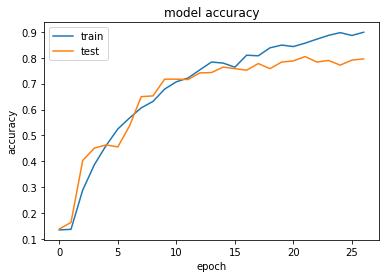

In [ ]:
# MODEL 5
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


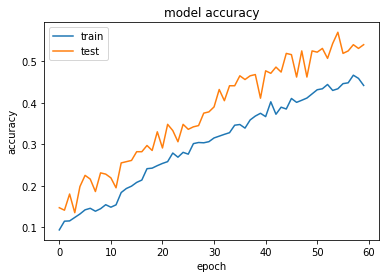

In [ ]:
# MODEL 6
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


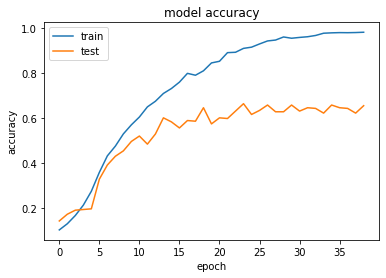

In [ ]:
# MODEL 7
# OVERFIT (training)
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<font color=orange>

## **37. EVALUATE MODEL(S) PERFORMANCE(S)** </font>



In [ ]:
# MODEL ONE (1)
model_one_1.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 3s 62ms/step - loss: 0.2659 - accuracy: 0.3228


[0.26588839292526245, 0.3228070139884949]

In [ ]:
# MODEL TWO (2)
model_two_2.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 3s 62ms/step - loss: 0.3651 - accuracy: 0.2498


[0.365080863237381, 0.24982456862926483]

In [ ]:
# MODEL THREE (3)
model_three_3.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 1s 27ms/step - loss: 0.2319 - accuracy: 0.3677


[0.23193423449993134, 0.36771929264068604]

In [ ]:
# MODEL FOUR (4)
model_four_4.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 1s 27ms/step - loss: 0.2262 - accuracy: 0.4372


[0.22619010508060455, 0.43719297647476196]

In [ ]:
# MODEL FIVE (5)
model.evaluate(X_test,y_test_e)

45/45 [==============================] - 1s 10ms/step - loss: 0.7014 - accuracy: 0.8021


[0.7013535499572754, 0.8021052479743958]

In [ ]:
# MODEL SIX (6)
model_ln3.evaluate(X_test,y_test_e)

45/45 [==============================] - 0s 6ms/step - loss: 1.5477 - accuracy: 0.5102


[1.5477043390274048, 0.5101754665374756]

In [ ]:
# MODEL SEVEN (7)
model_ln4.evaluate(X_test,y_test_e)

45/45 [==============================] - 0s 6ms/step - loss: 1.6557 - accuracy: 0.6189


[1.6556782722473145, 0.6189473867416382]

***

<font color=orange>

## **38. CONFUSION MATRIX** </font>

In [ ]:
# MODEL FIVE (5)
# TEST PREDICTION

y_test_pred_model_5 = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_model_5, axis=1)
y_test_pred_prob = np.max(y_test_pred_model_5, axis=1)

In [ ]:
# MODEL FIVE (5)
# TEST ACCURACY

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes)

0.0

In [ ]:
# MODEL FIVE (5)
# CONFUSION MATRIX

cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=labels, yticklabels=labels, annot=True)

ValueError: ignored

***

In [ ]:
# MODEL SIX (6)
# TEST PREDICTION

# Test Prediction 
y_test_pred_ln3 = model_ln3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)

In [ ]:
# MODEL SIX (6) 
# TEST ACCURACY

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln3)

0.0

In [ ]:
# MODEL SIX (6)
# CONFUSION MATRIX

cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=labels, yticklabels=labels, annot=True)

ValueError: ignored

***

In [ ]:
# MODEL SEVEN (7)
# TEST PREDICTION

# Test Prediction 
y_test_pred_ln4 = model_ln4.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)

In [ ]:
# MODEL SEVEN (7) 
# TEST ACCURACY

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln4)

0.0

In [ ]:
# MODEL SEVEN (7)
# CONFUSION MATRIX

cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

ValueError: ignored

***

<font color=orange>

## **39. Classification Report for each class** </font>


**Precision:** precision is the fraction of relevant instances among the retrieved instances.

**Recall:** recall is the fraction of relevant instances that were retrieved.

**F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



                      LABEL ORDER:

                      Black-grass
                      Charlock
                      Cleavers
                      Common Chickweed
                      Common wheat
                      Fat Hen
                      Loose Silky-bent
                      Maize
                      Scentless Mayweed
                      Shepherds Purse
                      Small-flowered Cranesbill
                      Sugar beet

In [ ]:
# MODEL FIVE (5)

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

ValueError: ignored

In [ ]:
# MODEL SIX (6)

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

ValueError: ignored

In [ ]:
# MODEL SEVEN (7)
from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

ValueError: ignored

***

<font color=orange>

## **39. WEIGHTED F-SCORE** </font>

In [ ]:
# MODEL FIVE (5)

from sklearn.metrics import f1_score
print('Model Five (5) F1 Score')
f1_score(np.array(y_test), y_test_pred_classes, average='weighted')

Model Five (5) F1 Score


ValueError: ignored

In [ ]:
# MODEL SIX (6)


from sklearn.metrics import f1_score
print('Model Six (6) F1 Score')
f1_score(np.array(y_test), y_test_pred_classes_ln3, average='weighted')

Model Six (6) F1 Score


ValueError: ignored

In [ ]:
# MODEL SEVEN (7)

from sklearn.metrics import f1_score
print('Model Seven (7) F1 Score')
f1_score(np.array(y_test), y_test_pred_classes_ln4, average='weighted')

Model Seven (7) F1 Score


ValueError: ignored

***

<font color=orange>

## **39. FINAL CONCLUSIONS** </font>

The rubric did not specifically require a confusion matrix or F-1 score, but in my attempt to go beyond the rubric, I had difficulty populating these from my function definitions. Accuracy and Loss are different perfomance metrics.


For all of my models, I adjusted the hyperparameters multiple times, but settled on the current versions.  I also tried another base_model for my transfer learning models.  The GPU speed to run the models was surprisingly very slow (which took much more time than expected). Ultimately, Colab crashed based on RAM usage, and I had to purchase a monthly subscription in order to complete my project on time (the execution times were faster with a paid subscription).


The fact that my python code errored for confusion matrix and F-1 scores was very frustrating.  Without excuses, I must report that there is a disconnect between the Great Learning CNN videos and the mandatory MLS classes.  Also, there is no one-on-one academic help for python errors that could be easily be a teaching moment to this learner in terms of fixing function definitions and/or function calls. I spent well over 2 weeks struggling on this project.  But I liked my efforts.

A farmer cannot get a better crop yield if s/he cannot differentiate between a weed and corn, wheat, or beets. Many computer vision algorithms seem to exist, but I must have chosen the wrong base_models.  I look forward to learning how to approach this project during the MLS session tomorrow, with Sashi.  Namaste.  


MODEL | TESTING ACCURACY | TESTING LOSS | Parameters BEFORE Flatten | Parameters AFTER Flatten | TOTAL PARAMETERS | F-1
----------|--------|-----|--------------|---------|--------|-------
Model 5   | .8021 |.7014|    423,296    | 4,207,628|4,630,924|N/A
Model 7    | .6189 |1.6557|    3,824    |  8,523,532|8,527,356|N/A
Model 6     | .5102 |1.5477|    3,824    |  262,404|266,228|N/A
Model 4   | .4372 |.2262|    1,179,904    | 68,076|1,247,980|N/A
Model 3    | .3677 |.2319|    589,952    |  17,148|607,100|N/A
Model 1     | .3228 |.2659|    2,359,424    |  17,148|2,376,572|N/A
Model 2     | .2498 |.3651|    4,718,848    |  33,532|4,752,380|N/A